In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from consolemenu import ConsoleMenu, SelectionMenu
import seaborn as sns

In [2]:
df_time1 = pd.read_csv('annexure1divisionwisesummary_csv.csv', delimiter='~#~', engine='python')
df_time1.columns

Index(['divisionid', 'divisionname', 'amount', 'cgst', 'sgst', 'igst',
       'filingmonth'],
      dtype='object')

In [9]:
# Assuming df_time1 is your original DataFrame
df_time = df_time1[['filingmonth', 'divisionid', 'divisionname']]

df_time.head()

,filingmonth,divisionid,divisionname
0,Jun-23,22,Bangalore North Circle
1,Nov-23,22,Bangalore North Circle
2,Aug-23,23,Bangalore South Circle
3,Dec-23,23,Bangalore South Circle
4,Jun-23,23,Bangalore South Circle


In [10]:
df_time.isna().sum()

filingmonth     0
divisionid      0
divisionname    0
dtype: int64

In [20]:
df_cost = df_time1.drop(['filingmonth','divisionid','divisionname'], axis=1)
df_cost.head()

,amount,cgst,sgst,igst
0,500.0,45.0,45.0,0.0
1,400.0,36.0,36.0,0.0
2,164367.0,14793.0,14793.0,0.0
3,400.0,36.0,36.0,0.0
4,1900.0,171.0,171.0,0.0


In [21]:
df_time.isna().sum()

filingmonth     7
divisionid      0
divisionname    0
dtype: int64

In [22]:
df_timeaxis = df_time[['filingmonth']]
df_timeaxis.head()

,filingmonth
0,2023-06-01
1,2023-11-01
2,2023-08-01
3,2023-12-01
4,2023-06-01


In [23]:
import pandas as pd

# Assuming 'df' is your DataFrame
df_time['filingmonth'] = pd.to_datetime(df_time['filingmonth'], format='%b-%y', errors='coerce')

# Count occurrences of each month
month_counts = df_time['filingmonth'].dt.strftime('%b-%y').value_counts()

# Ask the user for choice
user_choice = input("Enter 'all' to see counts for all months or enter a specific month (e.g., 'May-23'): ")

if user_choice.lower() == 'all':
    # Display counts for all months
    print("Counts for all months:")
    print(month_counts)
else:
    # Check if the user input is a valid month
    try:
        user_input_dt = pd.to_datetime(user_choice, format='%b-%y')
        user_input_str = user_input_dt.strftime('%b-%y')

        if user_input_str in month_counts.index:
            # Display count for the specified month
            count_for_user_input = month_counts[user_input_str]
            print(f"Count for {user_input_str}: {count_for_user_input}")
        else:
            print(f"Invalid month: {user_choice}")
    except ValueError:
        print(f"Invalid input: {user_choice}")


C:\Users\Roshn\AppData\Local\Temp\ipykernel_32892\1131698320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['filingmonth'] = pd.to_datetime(df_time['filingmonth'], format='%b-%y', errors='coerce')


Enter 'all' to see counts for all months or enter a specific month (e.g., 'May-23'): all
Counts for all months:
filingmonth
Jun-23    44
Nov-23    39
May-23    39
Aug-23    38
Oct-23    37
Jul-23    37
Sep-23    36
Apr-23    11
Dec-23     2
Name: count, dtype: int64


In [24]:
df_timeaxis.value_counts()

filingmonth
2023-06-01     44
2023-05-01     39
2023-11-01     39
2023-08-01     38
2023-07-01     37
2023-10-01     37
2023-09-01     36
2023-04-01     11
2023-12-01      2
Name: count, dtype: int64

In [25]:
sample_size = 20  # Adjust the sample size as needed
df = df_time.sample(n=sample_size)

Available columns in df_time:

  ┌─────────────────────────────────────────────────────────────────────────┐
  │                                                                         │
  │  Select X-axis column from df_time                                      │
  │                                                                         │
  │                                                                         │
  │    1 - filingmonth                                                      │
  │    2 - divisionid                                                       │
  │    3 - divisionname                                                     │
  │    4 - Exit                                                             │
  │                                                                         │
  │                                                                         │
  └─────────────────────────────────────────────────────────────────────────┘
  >> 2

Available columns in df_c

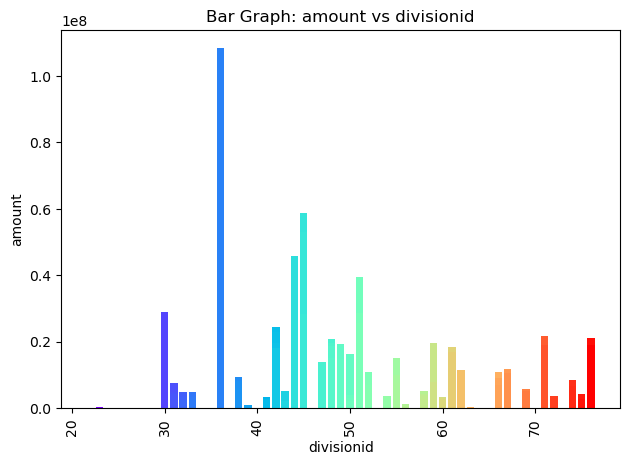

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you are using Seaborn for the heatmap


# Function to create a scrollable menu for column selection
def select_column(menu_title, column_names):
    menu = SelectionMenu(column_names, menu_title)
    menu.show()
    selected_index = menu.selected_option
    return column_names[selected_index]

# Display available columns for the user to choose from
print("Available columns in df_time:")
x_axis_column = select_column("Select X-axis column from df_time", df_time.columns)

print("\nAvailable columns in df_cost:")
y_axis_column = select_column("Select Y-axis column from df_cost", df_cost.columns)

# Check if the user-input columns exist in the respective DataFrames
if x_axis_column and y_axis_column:
    # Ask the user to choose the chart type
    chart_types = ['Bar Graph', 'Bubble Graph', 'Pie Chart', 'Scatter Plot', 'Heat Map']
    chart_type_menu = SelectionMenu(chart_types, "Select Chart Type")
    chart_type_menu.show()
    selected_chart_index = chart_type_menu.selected_option
    selected_chart_type = chart_types[selected_chart_index]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df_time1)))

    if selected_chart_type == 'Bar Graph':
        #         bar_width = 12
        plt.bar(df_time[x_axis_column], df_cost[y_axis_column],color=colors)        
        
        plt.xticks(rotation=45)
        plt.xlabel(x_axis_column)
        plt.ylabel(y_axis_column)        
        plt.title(f'Bar Graph: {y_axis_column} vs {x_axis_column}')
        plt.tight_layout()
        
    
    elif selected_chart_type == 'Bubble Graph':
        # Ask the user to choose the size column for the bubble graph
        size_column = select_column("Select Size Column for Bubble Graph", df_cost.columns)
        plt.scatter(df_time[x_axis_column], df_cost[y_axis_column], s=df_cost[size_column])

    elif selected_chart_type == 'Pie Chart':
        plt.pie(df_cost[y_axis_column], labels=df_time[x_axis_column], autopct='%1.1f%%')
        plt.title(f'Pie Chart: {y_axis_column} by {x_axis_column}')

    elif selected_chart_type == 'Scatter Plot':
        plt.scatter(df_time[x_axis_column], df_cost[y_axis_column],color = colors)

    elif selected_chart_type == 'Heat Map':
        # Assuming you want a heatmap for correlation
        sns.heatmap(df_cost.corr(), annot=True, cmap='coolwarm')
        plt.title('Heat Map: Correlation Matrix')

    # Rotate x-axis labels for all chart types
    plt.xticks(rotation=90)  # Adjust the rotation angle as needed

    plt.show()
else:
    print("Invalid column names. Please check your input.")
